In [23]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random
import os
import joblib
import time

def simular_datos_iot(n=1000, sensores=3, intervalo_segundos=60, semilla=2025):
    np.random.seed(semilla)
    registros = []
    inicio = datetime.now()

    for sensor_id in range(1, sensores + 1):
        tiempo = np.arange(n)
        base_temp, base_hum, base_co2 = 28, 65, 420

        temperatura = base_temp + np.random.normal(0, 1.0, n) + 2 * np.sin(2 * np.pi * tiempo / 720)
        humedad = base_hum + np.random.normal(0, 3.0, n) - 0.005 * tiempo
        co2 = base_co2 + np.random.normal(0, 10, n)
        tipo_evento = np.array(["normal"] * n)

        # Estrés térmico
        bloque_inicio = n // 3
        bloque_fin = bloque_inicio + n // 6
        stress = (tiempo >= bloque_inicio) & (tiempo <= bloque_fin)
        temperatura[stress] += 6
        humedad[stress] -= 20
        co2[stress] += 80
        tipo_evento[stress] = "estres_termico"

        presion = np.random.normal(1012, 4, n)
        zona_critica = (((temperatura > 33.5) & (humedad < 50)) | (co2 > 500)).astype(int)

        # Ruido en etiquetas
        ruido = int(n * 0.02)
        idx_ruido = np.random.choice(n, ruido, replace=False)
        zona_critica[idx_ruido] = 1 - zona_critica[idx_ruido]

        timestamps = [
            inicio + timedelta(seconds=i * intervalo_segundos + random.randint(-5, 5))
            for i in range(n)
        ]

        df = pd.DataFrame({
            "timestamp": timestamps,
            "sensor_id": sensor_id,
            "temperatura": temperatura,
            "humedad": humedad,
            "co2": co2,
            "presion": presion,
            "zona_critica": zona_critica,
            "tipo_evento": tipo_evento
        })

        registros.append(df)

    return pd.concat(registros, ignore_index=True)

# Clase sensor con ajuste de frecuencia
class SensorAutoconfigurable:
    def __init__(self, sensor_id, modelo, data):
        self.id = sensor_id
        self.modelo = modelo
        self.data = data[data["sensor_id"] == sensor_id].reset_index(drop=True)
        self.frecuencia = 10  # segundos
        self.protocolo = "WiFi"
        self.bateria = 100  # %
        self.index = 0

    def leer_datos(self):
        if self.index >= len(self.data):
            return None
        fila = self.data.iloc[self.index]
        self.index += 1
        return fila["temperatura"], fila["humedad"], fila["co2"], fila["timestamp"]

    def predecir(self, temp, hum, co2):
        entrada = pd.DataFrame([[temp, hum, co2]], columns=["temperatura", "humedad", "co2"])
        return self.modelo.predict(entrada)[0]

    def autoconfigurar(self, zona_critica):
        if zona_critica:
            self.frecuencia = 2
            self.protocolo = "LoRaWAN"
        elif self.bateria < 30:
            self.frecuencia = 30
            self.protocolo = "LoRa"
        else:
            self.frecuencia = 10
            self.protocolo = "WiFi"

    def operar(self, ciclos=20):
        for _ in range(ciclos):
            lectura = self.leer_datos()
            if lectura is None:
                print("No hay más datos.")
                break

            temp, hum, co2, ts = lectura
            zona_critica = self.predecir(temp, hum, co2)
            self.autoconfigurar(zona_critica)
            self.bateria -= np.random.uniform(0.5, 2.0)

            print(f"[{ts}] Sensor {self.id} | T: {temp:.1f}°C | H: {hum:.1f}% | CO₂: {co2:.1f}ppm | "
                  f"{'CRITICAL' if zona_critica else 'Normal'} | Freq: {self.frecuencia}s | "
                  f"Protocol: {self.protocolo} | Battery: {self.bateria:.1f}%")
            time.sleep(0.2)

# Generar dataset
if __name__ == "__main__":
    os.makedirs("Datos", exist_ok=True)
    df = simular_datos_iot(n=3000, sensores=4)
    df.to_csv("Datos/sensores.csv", index=False)
    print("Dataset generado con eventos de estrés térmico.")

Dataset generado con eventos de estrés térmico.


# Generar esenario de exp

Dataset Datos/thermal_stress_simulation.csv


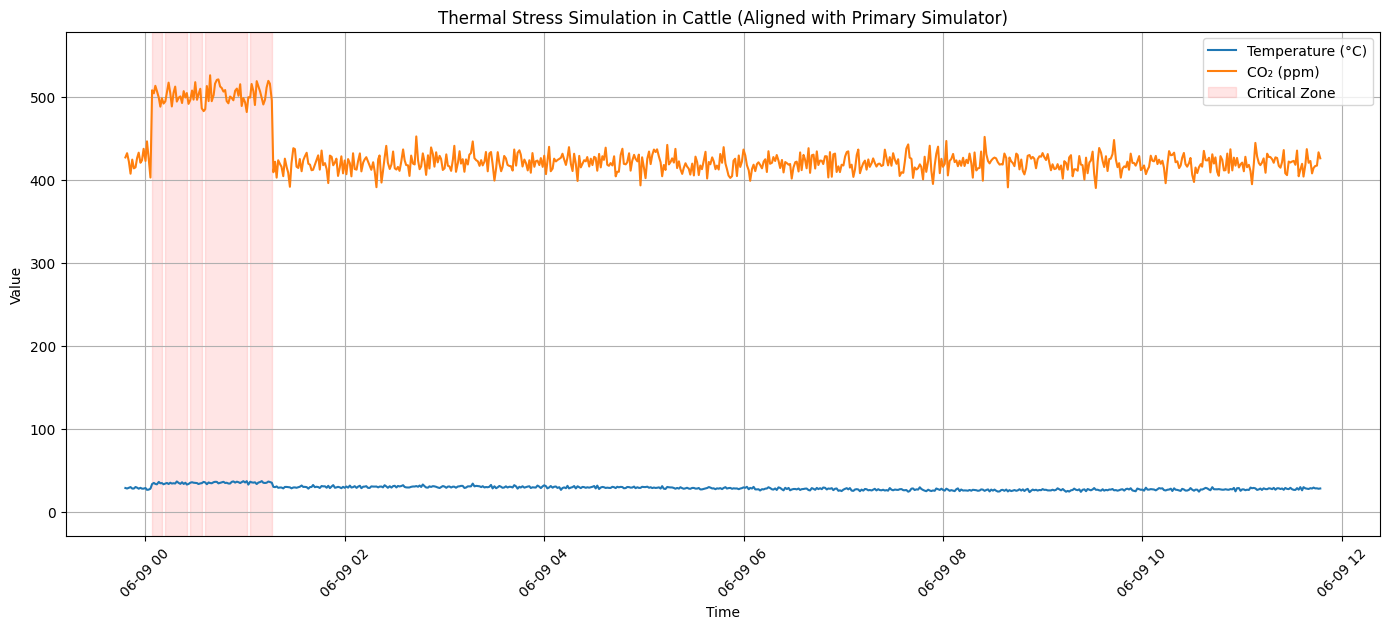

In [24]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random
import os
import matplotlib.pyplot as plt

def simulate_thermal_stress_in_cattle_pen_aligned(n=720, sensor_id=5, interval_seconds=60, seed=42):
    np.random.seed(seed)
    start_time = datetime.now()
    time_indices = np.arange(n)

    base_temp = 28
    base_hum = 65
    base_co2 = 420

    temperatura = base_temp + np.random.normal(0, 1.0, size=n) + 2 * np.sin(2 * np.pi * time_indices / 720)
    humedad = base_hum + np.random.normal(0, 3.0, size=n) - 0.005 * time_indices
    co2 = base_co2 + np.random.normal(0, 10, size=n)
    tipo_evento = np.array(["normal"] * n)

    # Bloque claro de estrés térmico
    stress_start = 16
    stress_end = stress_start + n // 10
    stress_indices = (time_indices >= stress_start) & (time_indices <= stress_end)

    temperatura[stress_indices] += 6
    humedad[stress_indices] -= 20
    co2[stress_indices] += 80
    tipo_evento[stress_indices] = "estres_termico"

    # Zona crítica
    zona_critica = (((temperatura > 33.5) & (humedad < 50)) | (co2 > 500)).astype(int)

    # Tiempo con jitter
    timestamps = [
        start_time + timedelta(seconds=i * interval_seconds + random.randint(-5, 5))
        for i in range(n)
    ]

    df = pd.DataFrame({
        'timestamp': timestamps,
        'sensor_id': sensor_id,
        'temperatura': temperatura,
        'humedad': humedad,
        'co2': co2,
        'presion': np.random.normal(1012, 4, size=n),
        'zona_critica': zona_critica,
        'tipo_evento': tipo_evento
    })

    return df

df_sim = simulate_thermal_stress_in_cattle_pen_aligned()
os.makedirs("Datos", exist_ok=True)
df_sim.to_csv("Datos/thermal_stress_simulation.csv", index=False)
print("Dataset Datos/thermal_stress_simulation.csv")

os.makedirs("Resultados", exist_ok=True)
plt.figure(figsize=(14, 6))
plt.plot(df_sim['timestamp'], df_sim['temperatura'], label='Temperature (°C)')
plt.plot(df_sim['timestamp'], df_sim['co2'], label='CO₂ (ppm)')
plt.fill_between(df_sim['timestamp'], 0, 1, where=df_sim['zona_critica'] == 1,
                 color='red', alpha=0.1, transform=plt.gca().get_xaxis_transform(), label='Critical Zone')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Thermal Stress Simulation in Cattle (Aligned with Primary Simulator)')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("Resultados/thermal_stress_plot.png")
plt.show()